# INFO 2950 Project Final Report
By: Hahnbee Lee (hl985), Section 205

## Introduction
### Context
On social media, I've been seeing more and more posts about how the Academy Awards (commonly known as the Oscars) are becoming "political" which I've interpreted to mean that the movies that win don't align with the general public's opinion. Therefore, in order to test whether this is actually true I wanted to analyze the Oscar's Best Picture nominee and winner data and their IMDB scores and gross. I specifically chose the Best Picture category because it is considered the most prestigious award of the ceremony, receives the most attention, and is the award that chooses its winner based on the whole movie (and not a single aspect of it).

### Research Questions
In order to compare the general public's reaction to a movie vs. what the Academy thinks is Best Picture winner worthy, I decided to observe the IMDB scores and gross of best picture nominees
Overarching Question:
- Does the best picture winner align with the movie's actual popularity?
Some questions I am trying to answer:
- What is the trend of IMDB scores for the movies that won the Best Picture award throughout the years?
- How do the IMDB scores of the movies that won Best Picture compare to the nominees in the same year?
- How do the gross of the Best Picture winner compare to the highest grossing movie of the same year?

###  Main Findings
There is no correlation between IMDB scores of best picture winners vs. the year the movie was nominated best picture. Nor is there a trend of the highest IMDB score between all the nominees in a given year throughout the years. However, 47.7% of the best picture winners had the highest IMDB score in comparison to its nominees. And only 11.4% of best picture winners were the highest grossing movie of its given year. The percentages show why people may feel like the Oscars are becoming more political (the existence of higher rated/grossing movies), but the claim that they are increasingly becoming more political is false (because of the lack of a trend).

## Data Description
**What are the observations (rows) and the attributes (columns)?**

The rows of the datasets includes all the best picture winners.
The columns include:
- averageRating - weighted average of all the individual user ratings
- numVotes - number of votes the title has received
- primaryTitle - the more popular title / the title used by the filmmakers on promotional materials at the point of release
- startYear - represents the release year of a title
- gross - the gross (sum of all income) of the movie
- gross_difs - $\text{gross_dif} = \text{the highest grossing movie's gross (in the same year)} - \text{the best picture winner's gross}$
- gross_dif_wo_inflation - gross_dif accounted for inflation
- ranking_dif - difference between highest ranking best picture nominee and winner

**Why was this dataset created?**
I created this dataset to observe relative popularity for best picture winners. The IMDB score, gross and year of the release is included to observe scores/gross over time. gross_difs and gross_dif_wo inflation is included to observe the relationship between the best picture winner and the highest grossing movie. ranking_dif is included to observe the relationship between the highest rated best picture nominee and best picture winner.
**Who funded the creation of the dataset?**
The original data was sourced from The Oscars, IMDB, The-Numbers.com, and wikipedia. But the final dataset was not created by an associated grant.

**What processes might have influenced what data was observed and recorded and what was not?**
My dataset attributes can be categorized into 3 scopes where each scope compares the best picture winner to a larger scope.
The IMDB data was observed to observe the trends of popularities of best picture winners throughout the years.
The differences between the ratings of the winners vs. the highest rated nominee was observed to compare the winners to the nominees and to answer the question "How does the popularity of the movies that won Best Picture compare to the nominees in the same year?"
The differences between the gross of the winner vs. the highest grossing movie of the same year was observed to compare the winners to the highest grodding movies in the same year and to answer the question "How do the gross of the Best Picture winner compare to the highest grossing movie of the same year?"
IMDB data was observed because you need to request access to the Rotten Tomatoes database. So, although I feel as though it would've been interesting to observe the critics vs. the audiences scores from rotton tomatoes I was not able to.
The Oscar database only had information about oscar nominations, winners, and the year that they were nominated/won. I could not find data for how much money was spent on the movies' oscar campaigns. This lack of monetary data is likely due to Hollywood's tendency to keep that sort of data private/ not easily accessible.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The Best Picture Winners had to be scraped from a search in the [Academy's database](http://awardsdatabase.oscars.org/). The [IMDB data](https://www.imdb.com/interfaces/) was originally two data tables (rankings data and movie title data) that were merged into one based on a "tconst" value ([link to code](https://github.coecis.cornell.edu/hl985/info2950/blob/f0c4b71de8669c82bcfd7beada7c4b3daa0ea64d/phase%202.ipynb)). Doing this provided the averageRating, numVotes,primaryTitle, and startYear attributes. 
- The gross of the movies was found by scraping [https://www.the-numbers.com/custom-search](https://www.the-numbers.com/custom-search)([link to code](https://github.coecis.cornell.edu/hl985/info2950/blob/master/Movie%20Gross.ipynb)).
- The difference of the highest grossing movie in the same year and the best picture's gross was found by finding the difference between the gross column and the highest grossing movie in the same year was found on [wikipedia](https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_the_United_States_by_year) ([link to code](https://github.coecis.cornell.edu/hl985/info2950/blob/master/Movie%20Gross.ipynb)).
- The gross difference accounted for inflation was found by using the [CPI provided by the U.S. Department of Labor Bureau of Labor Statistic](https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/) and the gross column and applying the equation $\text{Inflation Adjusted Value} = \frac{\text{actual value}}{\text{CPI}} * 100$

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).**

The Academy probably didn't expect me to use their query and then scrape the resulting search. Considering, the popularity of movies they probably just assumed people to use it for their own knowledge and not something as intensive as a data scrape. As for IMDB, their documentation and readily available tsv format proves to show that they probably expected people to use their data in a data science application. the-numbers.com actually has a database that you have to request access for, but I decided to scrape the html instead. wikipedia and the U.S. Department of Labor Bureau of Labor Statistic seems to readily provide information for people to use.
The only database that involved people is probably the imdb database and usually when people upload their reviews of movies they understand that it's public information, so they were most likely aware of the data collection.
Oscars data: http://awardsdatabase.oscars.org/

IMDB data: https://www.imdb.com/interfaces/
Web pages & CSVs: https://github.coecis.cornell.edu/hl985/info2950/tree/master/raw%20data

## Data Analysis

In [80]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

First, I analyzed imdb ratings of best picture winners overtime.

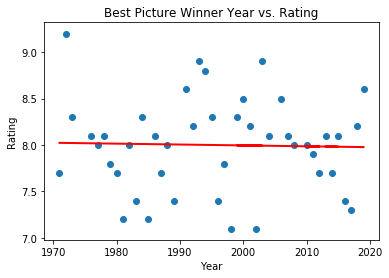

slope: -0.0009505042309029821
intercept: 9.8967311927669
minimum best picture winner imdb ranking: 7.1


In [62]:
bp_final = pd.read_csv('best_picture_winners.csv',delimiter=',',encoding='utf-8')
#find the correlation between the year the best picture award was given to the movie vs. its rating on imdb
year_rating_model = LinearRegression().fit(bp_final[["startYear"]], bp_final[["averageRating"]])
year_pred_rating = year_rating_model.predict(bp_final[["startYear"]])

plt.figure()
plt.scatter(bp_final['startYear'], bp_final['averageRating'])
plt.plot(bp_final['startYear'], year_pred_rating , color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Best Picture Winner Year vs. Rating')
plt.show()

print("slope:", year_rating_model.coef_[0][0])
print("intercept:", year_rating_model.intercept_[0])
print("minimum best picture winner imdb ranking:", bp_final.averageRating.min())

The graph shows that there is barely a relationship between the rating of a best picture winner and the year it was released. The slope is negative, but it is a number that is really close to 0, so I don't think it's enough to say that there is a negative relationship - especially because the points are very scattered. Additionally, the intercept is 9.89 which is really close to 10 - a perfect score. In fact, the minimum ranking between all of the best picture winners was a 7.1 which is relatively high. This data shows that the best picture winners are not getting decreasingly popular and that all the best picture winners rank relatively high in comparison to each other.

Next, I found the highest ranked best picture nominee for each year and found the difference between it and the best picture winners' imdb scores:

For every annual Academy award:
$$\text{ranking_dif} = \text{the highest rated best picture nominee's imdb score} - \text{the best picture winner's imdb score}$$

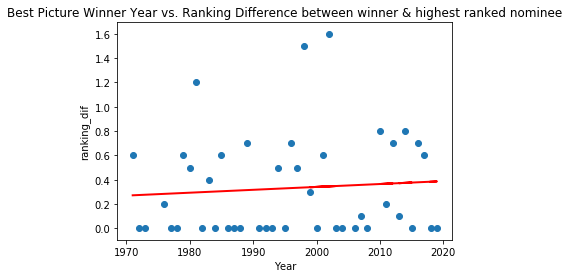

slope: 0.00238205633476295
intercept: -4.423847961474013


In [92]:
year_ratingDiff_model = LinearRegression().fit(bp_final[["startYear"]], bp_final[["ranking_dif"]])
year_pred_ratingDiff = year_ratingDiff_model.predict(bp_final[["startYear"]])

plt.figure()
plt.scatter(bp_final['startYear'], bp_final['ranking_dif'])
plt.plot(bp_final['startYear'], year_pred_ratingDiff , color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('ranking_dif')
plt.title('Best Picture Winner Year vs. Ranking Difference between winner & highest ranked nominee')
plt.show()
print("slope:", year_ratingDiff_model.coef_[0][0])
print("intercept:", year_ratingDiff_model.intercept_[0])

Rather, than observing the linear regression for this model, I think it's more relevant to observe how many of the differences equal 0 because if this is the case it means that the winner was the highest ranked nominee (also the posiitive correlated slope is very small).

In [64]:
# function for finding number of winners that had the highest score/gross
def find_is_highest(difs):
    is_highest = 0
    for dif in difs:
        if dif == None:
            continue
        elif dif <= 0:
            is_highest += 1
    return is_highest

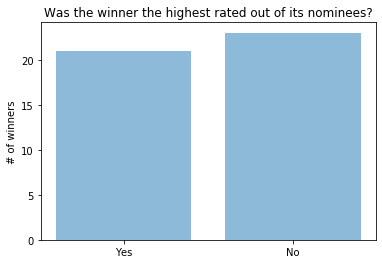

percentage of best picture winners that had the highest imdb rating out of its nominees: 47.7%


In [67]:
num_highest_rating = find_is_highest(bp_final['ranking_dif'])

objects = ('Yes', 'No')
objs = np.arange(len(objects))
tot_movies = len(bp_final)
no_yes = [num_highest_rating, tot_movies-num_highest_rating]

plt.figure()
plt.bar(objs, no_yes, align='center', alpha=0.5)
plt.xticks(objs, objects)
plt.ylabel('# of winners')
plt.title('Was the winner the highest rated out of its nominees?')
plt.show()
print("percentage of best picture winners that had the highest imdb rating out of its nominees: {:.1f}%".format((num_highest_rating / tot_movies) * 100))

The graph shows that 47.7% of the time the best picture winner had the highest rating out of all of the nominees in its same year. Although this might seem like a large percentage, this means that 52.3% of the time there existed a nominee that ranked higher than the winner. This means that there was another movie that the audience preferred which might explain the sentiment as to why people feel like the Oscars chooses movies that are not the crowd favorite.

Lastly, I compared the gross of the best picture winners to the highest grossing movie in the corresponding years.

For every annual Academy award:
$$\text{gross_dif} = \text{the highest grossing movie's gross} - \text{the best picture winner's gross}$$

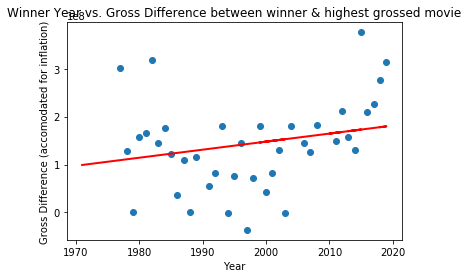

slope: 1679626.8966651997
intercept: -3211451092.736158


In [84]:
imputer = SimpleImputer()
y_imputed = imputer.fit_transform(bp_final[["gross_dif_wo_inflation"]])

year_gross_dif_model = LinearRegression().fit(bp_final[["startYear"]], y_imputed)
year_pred_gross_dif = year_gross_dif_model.predict(bp_final[["startYear"]])

plt.figure()
plt.scatter(bp_final['startYear'], bp_final['gross_dif_wo_inflation'])
plt.plot(bp_final['startYear'], year_pred_gross_dif , color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Gross Difference (accomodated for inflation)')
plt.title('Winner Year vs. Gross Difference between winner & highest grossed movie')
plt.show()

print("slope:", year_gross_dif_model.coef_[0][0])
print("intercept:", year_gross_dif_model.intercept_[0])

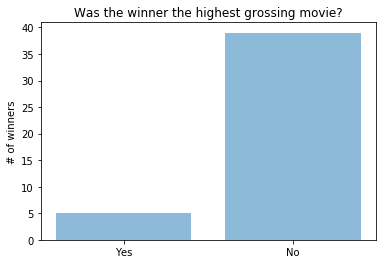

percentage of best picture winners that was the highest grossing movie in its year: 11.4%


In [71]:
is_highest_gross = find_is_highest(bp_final['gross_dif_wo_inflation'])

# find total number of movies that have gross difference data (account for the entries that are blank)
tot_movies_w_gross = 0
for i, movie in bp_final.iterrows():
    if movie.gross_dif_wo_inflation != None:
        tot_movies_w_gross += 1
        
no_yes_gross = [is_highest_gross, tot_movies_w_gross-is_highest_gross]

plt.bar(objs, no_yes_gross, align='center', alpha=0.5)
plt.xticks(objs, objects)
plt.ylabel('# of winners')
plt.title('Was the winner the highest grossing movie?')
plt.show()

print("percentage of best picture winners that was the highest grossing movie in its year: {:.1f}%".format((is_highest_gross / tot_movies_w_gross) * 100))

Even less movies were the highest grossing movie in its year.

## Evaluation of significance
Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness.

The immediate concern with imdb data is that the number of votes per movie differs. However, the average rank is actually already weighted to accomadate the number of votes. This can be seen by the correlation between number of votes and average ratings.

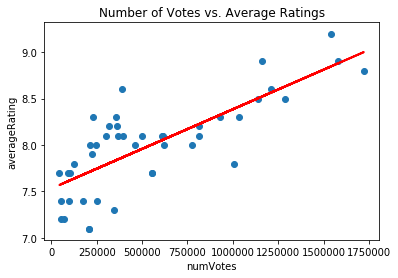

slope: 8.529462149496718e-07
intercept: 7.5318010932372275


In [88]:
# find number of votes vs. the average rating
numVotes_rank_model = LinearRegression().fit(bp_winners[["numVotes"]], bp_winners[["averageRating"]])
numVotes_pred_rank = numVotes_rank_model.predict(bp_winners[["numVotes"]])

plt.figure()
plt.scatter(bp_winners['numVotes'], bp_winners["averageRating"])
plt.plot(bp_winners['numVotes'], numVotes_pred_rank , color='red', linewidth=2)
plt.xlabel('numVotes')
plt.ylabel('averageRating')
plt.title('Number of Votes vs. Average Ratings')
plt.show()

print("slope:", numVotes_rank_model.coef_[0][0])
print("intercept:", numVotes_rank_model.intercept_[0])

In [90]:
# find joint coefficients
joint_rating_model = LinearRegression().fit(bp_final[["numVotes", "startYear"]], bp_final[["averageRating"]])
joint_coef = joint_rating_model.coef_

print("startYear coefficient:", joint_coef[0][1])

startYear coefficient: -0.005933116588328985


The startYear coefficient using a joint model with numVotes and startYear remains pretty close to 0 similar to what we got before when we used only startYear for the model.

**Random Permutations**

year vs. rating

In [107]:
def create_perms(x,y):
    perm_slopes = np.zeros(1000)
    for i in range(1000):
        perm_slopes[i] = LinearRegression().fit(x, y).coef_[0][0]
    return perm_slopes

In [99]:
def create_hist(slopes, title):
    plt.figure()
    plt.hist(slopes, align="left", rwidth=0.8, bins=30)
    plt.xlabel('Slope')
    plt.ylabel('Density')
    plt.title(title)
    plt.show()
    return slopes

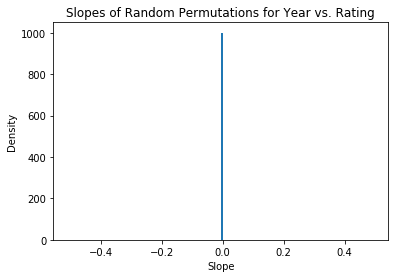

In [108]:
perm_year_rating_slopes = create_perms(bp_final[["startYear"]],bp_final[["averageRating"]])
year_rating_slopes_hist = create_hist(perm_year_rating_slopes, 'Slopes of Random Permutations for Year vs. Rating')

This shows that there really is no relationship between the year a movie won best picture and its rating like we previously concluded.

Best Picture Winner Year vs. Ranking Difference between winner & highest ranked nominee

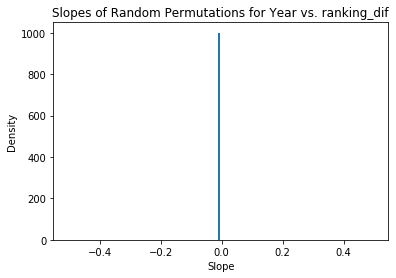

In [109]:
perm_year_ranking_dif_slopes = create_perms(bp_final[["startYear"]],bp_final[["ranking_dif"]])
year_ranking_dif_slopes_hist = create_hist(perm_year_ranking_dif_slopes, 'Slopes of Random Permutations for Year vs. ranking_dif')

This shows that the difference between the highest ranked nominee and winner is not increasing at all and the slight positive correlation found in the original graph truly is no indicator.

Best Picture Winner Year vs. Highest Grossing Movie (accommodated for inflation)

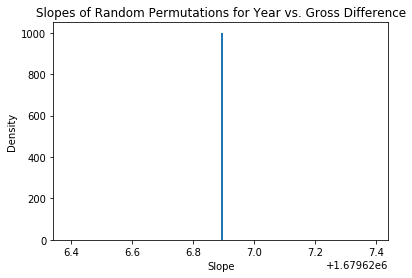

In [111]:
perm_year_gross_dif_slopes = create_perms(bp_final[["startYear"]],y_imputed)
year_gross_dif_slopes_hist = create_hist(perm_year_gross_dif_slopes, 'Slopes of Random Permutations for Year vs. Gross Difference')

This shows that the positive slope we found in the original year vs. gross difference data was an indication of a trend of an increasing gross difference.

## Conclusion
I found that there are no trends between the Best Picture Winners and popularity over time - this includes in comparison to themselves (over time) and the nominees. I'm pretty confident in this lack of trend over time because of my random permutations. However, I'm not sure if the results would have been different if I used other movie rating scores such as letterboxd or rotten tomatoes.

Contrastingly, there is a positive correlation between the difference between the best picture nominee's gross and highest grossing movies in the corresponding year. I'm not 100% sure about if this positive correlation is accurate because even though I accommodated for inflation it may just be that people gradually spent more money on films over time. Or it could be that the population grew which could explain an increase in gross when in actuality the same percentage of people are spending money on movies.

I think the more interesting data is that 47.7% of the time the best picture winner had the highest rating out of all of the nominees in its same year. And that 11.4% of the time the best picture winner was the highest grossing film of its year. This means that 53.3% of the time there was another nominee that was more popular and that 88.6% of the time the winner wasn't the highest grossing movie of the year. This information explains why people believe that the Academy is "political" which was what incentivized this project. For example, in 2019 the highest grossing movie was Avengers: Endgame, but the best picture winner was Greenbook. These percentages do not mean that the Academy is increasingly becoming more political, however. They only show that as you bring the scope out from comparing the winner to the nominees and the highest grossing movies, they are comparatively less popular.


## Source code

Github: [https://github.coecis.cornell.edu/hl985/info2950](https://github.coecis.cornell.edu/hl985/info2950)

**Data Scraping**
- [best picture winners & nominees](https://github.coecis.cornell.edu/hl985/info2950/blob/master/phase%202.ipynb)
- [gross data](https://github.coecis.cornell.edu/hl985/info2950/blob/master/Movie%20Gross.ipynb)

**Calculations**
- [finding rating and gross differences](https://github.coecis.cornell.edu/hl985/info2950/blob/ac150d160a7a9fba3f356d60ce2a67f87508adbf/final-report-hahnbee-lee.ipynb) (skip to section labeled Source Code)

## Acknowledgments

### Data Cleaning
- For deleting duplicates: https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/ , https://stackoverflow.com/questions/39880627/in-pandas-how-to-delete-rows-from-a-data-frame-based-on-another-data-frame
- Joining Dataframes: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html , https://www.w3schools.com/sql/sql_join.asp
- Get rid of unnecessary columns: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
- export dataframe to csv: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
- Using requests.get() with beautiful soup: https://www.statworx.com/ch/blog/web-scraping-101-in-python-with-requests-beautifulsoup/